# NLP


In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-09-15 18:52:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-15 18:52:26 (104 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster)

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2023-09-15 18:52:32--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.217.194.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   715KB/s    in 0.8s    

2023-09-15 18:52:33 (715 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
import zipfile

zip = zipfile.ZipFile("nlp_getting_started.zip")
zip.extractall()
zip.close()

## Becoming one with the data

Visualize Visualize Visualize

In [5]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [6]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
train_df['text'][1]

'Forest fire near La Ronge Sask. Canada'

In [8]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)

In [9]:
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [10]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [11]:
# What does the test dataframe look like?

test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [12]:
# How many total samples
len(train_df), len(test_df)

(7613, 3263)

In [13]:
# Let's visualize some random training wxamples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index: random_index+5].itertuples():
    _, text, target = row
    print(f"Target:{target}","(real disaster)" if target> 0 else "not real disaster")
    print(f"Text:\n {text}\n")
    print(f"---\n")

Target:1 (real disaster)
Text:
 #Sismo DETECTADO #JapÌ_n 15:41:07 Seismic intensity 0 Iwate Miyagi JST #?? http://t.co/gMoUl9zQ2Q

---

Target:0 not real disaster
Text:
 A look at state actions a year after Ferguson's upheaval http://t.co/GZEkQWzijq

---

Target:0 not real disaster
Text:
 FINALLY a storm

---

Target:0 not real disaster
Text:
 Last Second OutBid RT? http://t.co/KrNW0Wxhe5 30pcs 12mm Ab Resin Flower Whirlwind Flatback Rhinestone Wedding Decoration ?Please Fa

---

Target:0 not real disaster
Text:
 #Colorado #Avalanche Men's Official Colorado Avalanche Reebok T-Shirt XL Blue 100% Cotton http://t.co/ZNSvsTGwx3 #NHL #Hockey

---



### Split data into training and validation sets

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
train_sentences, val_sentences, train_labels, val_labels  = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                             train_df_shuffled["target"].to_numpy(),
                                                                             test_size = 0.1,
                                                                             random_state = 42)

In [16]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [17]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

<Axes: xlabel='target', ylabel='count'>

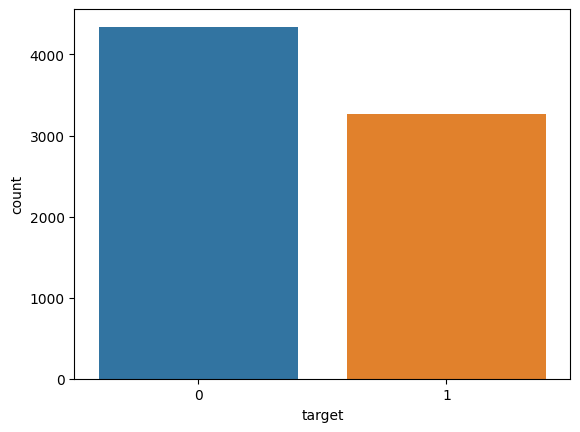

In [18]:
import seaborn as sns
sns.countplot(train_df_shuffled, x = train_df_shuffled.target)

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token(a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token(the size of the feature vector can be defined and this embedding can be learned)

### Text vectorization (tokenization)

In [19]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.layers import TextVectorization

In [22]:
# Use the defalut TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens = None,
                                    standardize = "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None,
                                    output_mode = "int",
                                    output_sequence_length = None)

In [23]:
# Find the average number fo tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [24]:
#Setup text vectorization variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

In [25]:
# Fit the text vectorizator to the train data
text_vectorizer.adapt(train_sentences)

In [26]:
# Crate a smaple sentence and tokenize it
sample_sentence = "There's a flood in India"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4, 544,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [27]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\n\n \
Vectorized version:")
text_vectorizer([random_sentence])

Original text:
 Man . somebody gotta stop Sbee dude too fuckin funny blood

 Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  89, 1973, 1404,  240, 8776, 1087,  150, 3826, 1136,  353,    0,
           0,    0,    0,    0]])>

In [28]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Number of words in vobab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vobab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']



## Creating embedding via embedding layer

The parameters we modst care about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer.

In [29]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length,
                             output_dim = 128,
                             embeddings_initializer = 'uniform',
                             input_length = max_length)
embedding

In [30]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbeded version:")
# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer ([random_sentence]))
sample_embed

Original text:
 The greatest female beat boxer ever now but it's w/e... Save babies outta burning buildings on my free time but ya know.. whatevs..        

Embeded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.02178299,  0.02940765,  0.00661613, ...,  0.03574499,
         -0.01819082,  0.04139764],
        [ 0.04481165,  0.04211375, -0.0132257 , ..., -0.00798551,
         -0.04281359,  0.03918454],
        [-0.00543118, -0.03972641, -0.00856376, ..., -0.01568897,
          0.03514874, -0.04143206],
        ...,
        [-0.02146628, -0.04095428, -0.03581059, ...,  0.0478943 ,
          0.03182277, -0.00070703],
        [-0.03466799,  0.03554512, -0.02169783, ...,  0.01940108,
          0.00874181,  0.01692145],
        [ 0.03835669,  0.03186801, -0.0461401 , ...,  0.00442379,
          0.02651811,  0.01231977]]], dtype=float32)>

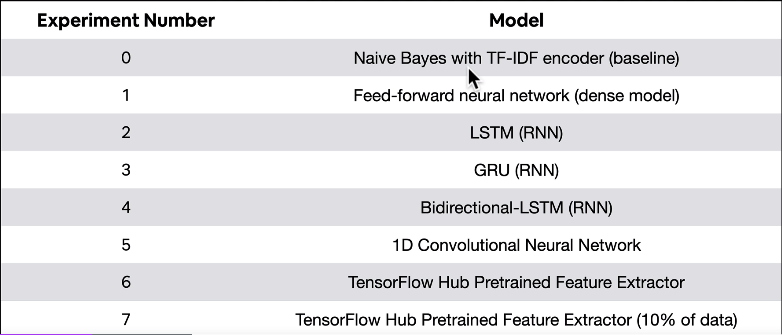

## Model 0 baseline

baseline is an important step so that we get a benchmark to work upon

To create our baseline, we'll use sklearn's multinomial Naive bayes using the TF-IDF formula to convert our words to numbers.


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [32]:
baseline_score = model_0.score(val_sentences, val_labels)

In [33]:
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [34]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [35]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)

In [36]:
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

### Creating an evaluation fuction for our model experiments

Let's create one to compare our model's predictions with the truth labels using the following metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [37]:
# Function to evaluate: accuracy, precision, recall, fq-score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def calculate_results(val_labels, preds):

  accuracy = accuracy_score(val_labels, preds)*100
  precision = precision_score(val_labels, preds)
  recall = recall_score(val_labels, preds)
  f1 = f1_score(val_labels, preds)
  evaluators = {'accuracy':accuracy,
                'precision':precision,
                'recall':recall,
                'f1-score':f1}
  return evaluators

In [38]:
fart = calculate_results(val_labels,baseline_preds)
print(f"fart:{fart}")

fart:{'accuracy': 79.26509186351706, 'precision': 0.8861788617886179, 'recall': 0.6264367816091954, 'f1-score': 0.734006734006734}


In [39]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import seaborn as sns
# sns.barplot(fart.values(), x = fart.keys())

In [40]:
import numpy as np
np.arange(1, 5, 1)

array([1, 2, 3, 4])

## Model 1: A simple dense model

In [41]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [42]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens)
outputs = layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [43]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [44]:
# Compile model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [45]:
# Fit the model
model_1.history = model_1.fit(x = train_sentences,
                              y = train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20230915-185242
Epoch 1/5
215/215 [==============================] - 29s 96ms/step - loss: 0.6078 - accuracy: 0.6971 - val_loss: 0.5372 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4395 - accuracy: 0.8181 - val_loss: 0.4681 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3458 - accuracy: 0.8616 - val_loss: 0.4583 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2827 - accuracy: 0.8929 - val_loss: 0.4619 - val_accuracy: 0.7953
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2365 - accuracy: 0.9126 - val_loss: 0.4775 - val_accuracy: 0.7887


In [46]:
baseline_score, model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7887


(0.7926509186351706, [0.47751808166503906, 0.7887139320373535])

In [47]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [48]:
model_1_pred_probs[:10]

array([[0.39608094],
       [0.7404298 ],
       [0.99720734],
       [0.1123201 ],
       [0.1154286 ],
       [0.9353178 ],
       [0.90243703],
       [0.9933061 ],
       [0.9642013 ],
       [0.27535003]], dtype=float32)

In [49]:
val_labels

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [50]:
# Convert model prediciton probabilities ot labes form
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [51]:
model_1_results = calculate_results(val_labels,
                                    model_1_preds)
model_1_results

{'accuracy': 78.87139107611549,
 'precision': 0.8280701754385965,
 'recall': 0.6781609195402298,
 'f1-score': 0.74565560821485}

In [52]:
fart

{'accuracy': 79.26509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1-score': 0.734006734006734}

In [53]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(fart.values()))

array([False, False,  True,  True])

## Visualize the embedding

In [54]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [55]:
# model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [56]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training dataset)
embed_weights = model_1.get_layer("embedding").get_weights()[0]

In [57]:
print(embed_weights.shape) # same size as vocab size and embedding_dim (output_dim of our embedding layer)

(10000, 128)


In [58]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [59]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural Networks(RNN's)


### Model 2: LSTM

LSTM  = long short term memory (one of the most popular LSTM cells)

Our structure of an RNN typically looks like this:

```
Input(text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)
```

In [60]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape = (1,), dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
# x = layers.LSTM(64, return_sequences = True)(x)
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
# x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')

In [61]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [62]:
# compile the mdoel
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [63]:
# Fit the model
model_2_hsitory = model_2.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230915-185323
Epoch 1/5
215/215 [==============================] - 16s 59ms/step - loss: 0.2253 - accuracy: 0.9165 - val_loss: 0.5120 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.1566 - accuracy: 0.9431 - val_loss: 0.6565 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.1263 - accuracy: 0.9527 - val_loss: 0.8099 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1057 - accuracy: 0.9577 - val_loss: 0.8397 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0870 - accuracy: 0.9673 - val_loss: 1.0459 - val_accuracy: 0.7703


In [64]:
# Make predictions with LST model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[4.1699572e-03],
       [4.5468268e-01],
       [9.9985671e-01],
       [4.1255519e-02],
       [4.6376785e-04],
       [9.9952722e-01],
       [7.9308397e-01],
       [9.9989569e-01],
       [9.9981230e-01],
       [7.4593478e-01]], dtype=float32)

In [65]:
# Convert model 2 pred probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 1., 0., 0.], dtype=float32)>

In [66]:
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 77.03412073490814,
 'precision': 0.7873754152823921,
 'recall': 0.6810344827586207,
 'f1-score': 0.7303543913713406}

## Building a model_3 using the GRU cells

GRU is another popular and effective RNN or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [67]:
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [68]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

In [69]:
# Compile the mdoel
model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [70]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                            train_labels,
                            epochs = 5,
                            validation_data = [val_sentences, val_labels],
                            callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20230915-185351
Epoch 1/5
215/215 [==============================] - 15s 57ms/step - loss: 0.5312 - accuracy: 0.7281 - val_loss: 0.4527 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3162 - accuracy: 0.8697 - val_loss: 0.4631 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2173 - accuracy: 0.9207 - val_loss: 0.5061 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1613 - accuracy: 0.9442 - val_loss: 0.5238 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.1170 - accuracy: 0.9610 - val_loss: 0.7032 - val_accuracy: 0.7598


In [71]:
# Make some predictions with our GRU mdoel
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.38844728],
       [0.6387241 ],
       [0.9993808 ],
       [0.09192458],
       [0.00521682],
       [0.9947418 ],
       [0.908816  ],
       [0.9990243 ],
       [0.9980235 ],
       [0.1845398 ]], dtype=float32)

In [72]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [73]:
# Calculate model 3 results
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results


{'accuracy': 75.98425196850394,
 'precision': 0.7635782747603834,
 'recall': 0.6867816091954023,
 'f1-score': 0.7231467473524964}

## Building model_4 from bidirectional cells

In [74]:
from tensorflow.keras import layers
inputs = layers.Input(shape = (1, ), dtype = "string")
model_4_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     input_length = max_length)
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs)

In [75]:
# Compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [76]:
# fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = [val_sentences, val_labels],
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230915-185435
Epoch 1/5
215/215 [==============================] - 17s 61ms/step - loss: 0.5124 - accuracy: 0.7454 - val_loss: 0.4539 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.3099 - accuracy: 0.8759 - val_loss: 0.5221 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.2079 - accuracy: 0.9223 - val_loss: 0.5977 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1433 - accuracy: 0.9489 - val_loss: 0.6881 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0951 - accuracy: 0.9631 - val_loss: 0.8062 - val_accuracy: 0.7664


In [77]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[6.9378272e-02],
       [7.9486954e-01],
       [9.9936169e-01],
       [6.5775044e-02],
       [6.5939489e-04],
       [9.9601424e-01],
       [9.9541169e-01],
       [9.9971098e-01],
       [9.9982834e-01],
       [2.7811989e-01]], dtype=float32)

In [78]:
# Convert pred probs to pred labels
model_4_probs = tf.squeeze(tf.round(model_4_pred_probs))
model_4_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [79]:
# Calculate the results of bidirectional model
model_4_results = calculate_results(val_labels,
                                    model_4_probs)
model_4_results

{'accuracy': 76.64041994750657,
 'precision': 0.7796052631578947,
 'recall': 0.6810344827586207,
 'f1-score': 0.7269938650306749}

## CNN for text(and other types of sequences)

We use CNNs for images but images are typically 2D (height x width) however, text data is usually 1D.

Therefore we use conv1D model.

structure of a conv1D model

```
Inputs(text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs
```

## Model 5: Conv1D

In [80]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_test = embedding(text_vectorizer(['This is a test sentence'])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters = 32,
                        kernel_size = 5,
                        strides = 1,
                        activation = 'relu',
                        padding = 'same')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
average_pool = layers.GlobalAveragePooling1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [81]:
# embedding_test

In [82]:
# conv_1d_output

In [83]:
tf.random.set_seed(42)
model_5_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = 'uniform',
                                     input_length = max_length,
                                     name = 'embedding_5')

from tensorflow.keras import layers

# Create a 1-dimentional convolution layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape = (1, ), dtype = tf.string)
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters = 64,
                  kernel_size = 5,
                  activation = 'relu',
                  padding = 'valid',
                  strides = 1)(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation = "sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name = 'model_5_Conv1D')

# Conpile Conv1D
model_5.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

# Get a summary of our conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 1)              

In [84]:
# Fit the model
model_5_hsitory = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR, 'Conv1D')])

Saving TensorBoard log files to: model_logs/Conv1D/20230915-185509
Epoch 1/5
215/215 [==============================] - 14s 51ms/step - loss: 0.5529 - accuracy: 0.7216 - val_loss: 0.4629 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3308 - accuracy: 0.8664 - val_loss: 0.4744 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.2018 - accuracy: 0.9276 - val_loss: 0.5416 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1271 - accuracy: 0.9584 - val_loss: 0.6182 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0883 - accuracy: 0.9692 - val_loss: 0.6856 - val_accuracy: 0.7927


In [85]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[0.43925622],
       [0.720195  ],
       [0.9997402 ],
       [0.09986333],
       [0.00234126],
       [0.9927089 ],
       [0.91386855],
       [0.9987935 ],
       [0.9995993 ],
       [0.33442414]], dtype=float32)

In [86]:
# Convert model_5 pred probs to labels
model_5_results = tf.squeeze(tf.round(model_5_pred_probs))
model_5_results[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [87]:
# Evaluate model 5 predictions
model_5_results = calculate_results(val_labels,
                                    model_5_results)
model_5_results

{'accuracy': 79.26509186351706,
 'precision': 0.8392857142857143,
 'recall': 0.6752873563218391,
 'f1-score': 0.7484076433121019}

In [88]:
model_5_results

{'accuracy': 79.26509186351706,
 'precision': 0.8392857142857143,
 'recall': 0.6752873563218391,
 'f1-score': 0.7484076433121019}

## Model 6: TensorFlow Hub Pretrained sentence Encoder

In [89]:
sample_sentence

"There's a flood in India"

In [90]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_sample = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_sample[0][:50])

tf.Tensor(
[-0.03008762  0.01636504  0.02910312 -0.04107415  0.01991504  0.03080593
  0.05297765  0.02684154  0.00492787 -0.02317205 -0.01961806  0.04975324
 -0.01098909  0.06210162  0.05634845 -0.05376287  0.04289038 -0.04329098
  0.01700617 -0.06429473 -0.02549578  0.0516816   0.05861225  0.00769241
  0.0514438  -0.06380092  0.01626457 -0.00027812 -0.01923464 -0.05130115
 -0.02689289  0.01593835 -0.01796332 -0.04301985 -0.03136194 -0.04945775
 -0.0097535   0.03222163 -0.06790151 -0.05527705  0.00524023 -0.03610665
 -0.03505817  0.07313287 -0.09283629  0.02574191  0.03023575 -0.00727875
 -0.056266    0.05938186], shape=(50,), dtype=float32)


In [91]:
embed_sample

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.03008762,  0.01636504,  0.02910312, ..., -0.0223035 ,
        -0.04314806, -0.08955679],
       [ 0.0359669 , -0.08579469, -0.01152742, ..., -0.03414334,
         0.02816021, -0.00878944]], dtype=float32)>

In [92]:
# Create a Keras Layers using the USe pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False,
                                        name = "USE")

In [100]:
# Create model usign Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = 'relu', name = 'dense_layer'),
    layers.Dense(1, activation = 'sigmoid', name = 'output_layer')
], name = 'model_6_USE')

# Compile
model_6.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_layer (Dense)         (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [107]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230915-191252
Epoch 1/5
215/215 [==============================] - 6s 28ms/step - loss: 0.3792 - accuracy: 0.8327 - val_loss: 0.4253 - val_accuracy: 0.8215
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3728 - accuracy: 0.8346 - val_loss: 0.4246 - val_accuracy: 0.8228
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3653 - accuracy: 0.8390 - val_loss: 0.4268 - val_accuracy: 0.8241
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3598 - accuracy: 0.8415 - val_loss: 0.4261 - val_accuracy: 0.8189
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3538 - accuracy: 0.8457 - val_loss: 0.4314 - val_accuracy: 0.8215


In [108]:
# Maake prediction with USE TF hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 0s 11ms/step


array([[0.16651587],
       [0.74111354],
       [0.9951166 ],
       [0.22765669],
       [0.65961677],
       [0.6936106 ],
       [0.99109906],
       [0.9893205 ],
       [0.9457704 ],
       [0.07421738]], dtype=float32)

In [109]:
# comvert prediction probabilities to labels
model_6_pred_probs = tf.squeeze(tf.round(model_6_pred_probs))
model_6_pred_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [110]:
model_6_results = calculate_results(val_labels,
                                    model_6_pred_probs)

In [111]:
model_6_results

{'accuracy': 82.1522309711286,
 'precision': 0.8581081081081081,
 'recall': 0.7298850574712644,
 'f1-score': 0.7888198757763976}

In [112]:
baseline_score

0.7926509186351706

## Model 7: TF HUB  Pretrained USE but with 10% of training data

In [118]:
# Create subssets of 10% of the trianing data
train_10_percent = train_df_shuffled[['text', 'target']].sample(frac = 0.1, random_state = 42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent['target'].to_list()
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [120]:
# Check the umber of targets in our subset of data
train_10_percent['target'].value_counts()

0    413
1    348
Name: target, dtype: int64

In [122]:
train_df_shuffled['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [146]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation = 'relu', name = 'dense_layer'),
    layers.Dense(1, activation = 'sigmoid', name = "output_layer")
], name = 'model_7')

# compile

model_7.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_layer (Dense)         (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [126]:
# you may also use tf.keras.models.clone_model() method
# model_7= tf.keras.model.clone_model(model_6)
# now compile the new model_7 same as the model_6

In [150]:
model_7_history = model_7.fit(train_sentences_10_percent,
            train_labels_10_percent,
            epochs = 5,
            validation_data = (val_sentences, val_labels),
            callbacks =[create_tensorboard_callback(SAVE_DIR,
                                                        "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20230915-195833
Epoch 1/5
22/22 [==============================] - 4s 50ms/step - loss: 0.6643 - accuracy: 0.7051 - val_loss: 0.6443 - val_accuracy: 0.7283
Epoch 2/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5947 - accuracy: 0.8000 - val_loss: 0.5885 - val_accuracy: 0.7638
Epoch 3/5
22/22 [==============================] - 1s 31ms/step - loss: 0.5189 - accuracy: 0.8161 - val_loss: 0.5336 - val_accuracy: 0.7756
Epoch 4/5
22/22 [==============================] - 1s 25ms/step - loss: 0.4576 - accuracy: 0.8161 - val_loss: 0.5028 - val_accuracy: 0.7822
Epoch 5/5
22/22 [==============================] - 1s 29ms/step - loss: 0.4169 - accuracy: 0.8321 - val_loss: 0.4875 - val_accuracy: 0.7795


In [151]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 12ms/step


array([[0.20078132],
       [0.5716604 ],
       [0.9080071 ],
       [0.39533928],
       [0.5620657 ],
       [0.7223041 ],
       [0.8907467 ],
       [0.82398796],
       [0.8442433 ],
       [0.13483813]], dtype=float32)

In [152]:
model_7_pred = tf.squeeze(tf.round(model_7_pred_probs))
model_7_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [153]:
model_7_results = calculate_results(val_labels,
                                    model_7_pred)
model_7_results

{'accuracy': 77.95275590551181,
 'precision': 0.7941176470588235,
 'recall': 0.6982758620689655,
 'f1-score': 0.7431192660550457}

In [136]:
model_6_results

{'accuracy': 82.1522309711286,
 'precision': 0.8581081081081081,
 'recall': 0.7298850574712644,
 'f1-score': 0.7888198757763976}

In [148]:
# Making a better dataset split(no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[: train_10_percent_split]
train_labels_10_percent = train_labels[: train_10_percent_split]
# len(trian_sentences_10_percent)

In [149]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

## Comparing the performance of each of our models


In [154]:
baseline_results = calculate_results(baseline_preds, val_labels)

In [167]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({'0_baseline': baseline_results,
                                  '1_simple_dense': model_1_results,
                                  '2_lstm': model_2_results,
                                  '3_gru': model_3_results,
                                  '4_bidirectional': model_4_results,
                                  '5_conv1d': model_5_results,
                                  '6_tf_hub_use_encoder': model_6_results,
                                  '7_tf_hub_use_encoder_10_percent': model_7_results})
all_model_results = all_model_results.T
all_model_results

,accuracy,precision,recall,f1-score
0_baseline,79.265092,0.626437,0.886179,0.734007
1_simple_dense,78.871391,0.828070,0.678161,0.745656
2_lstm,77.034121,0.787375,0.681034,0.730354
3_gru,75.984252,0.763578,0.686782,0.723147
4_bidirectional,76.640420,0.779605,0.681034,0.726994
5_conv1d,79.265092,0.839286,0.675287,0.748408
6_tf_hub_use_encoder,82.152231,0.858108,0.729885,0.788820
7_tf_hub_use_encoder_10_percent,77.952756,0.794118,0.698276,0.743119


In [168]:
# Reduce the accuracy to the smae scale as other metrics
all_model_results['accuracy'] = all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1-score
0_baseline,0.792651,0.626437,0.886179,0.734007
1_simple_dense,0.788714,0.828070,0.678161,0.745656
2_lstm,0.770341,0.787375,0.681034,0.730354
3_gru,0.759843,0.763578,0.686782,0.723147
4_bidirectional,0.766404,0.779605,0.681034,0.726994
5_conv1d,0.792651,0.839286,0.675287,0.748408
6_tf_hub_use_encoder,0.821522,0.858108,0.729885,0.788820
7_tf_hub_use_encoder_10_percent,0.779528,0.794118,0.698276,0.743119


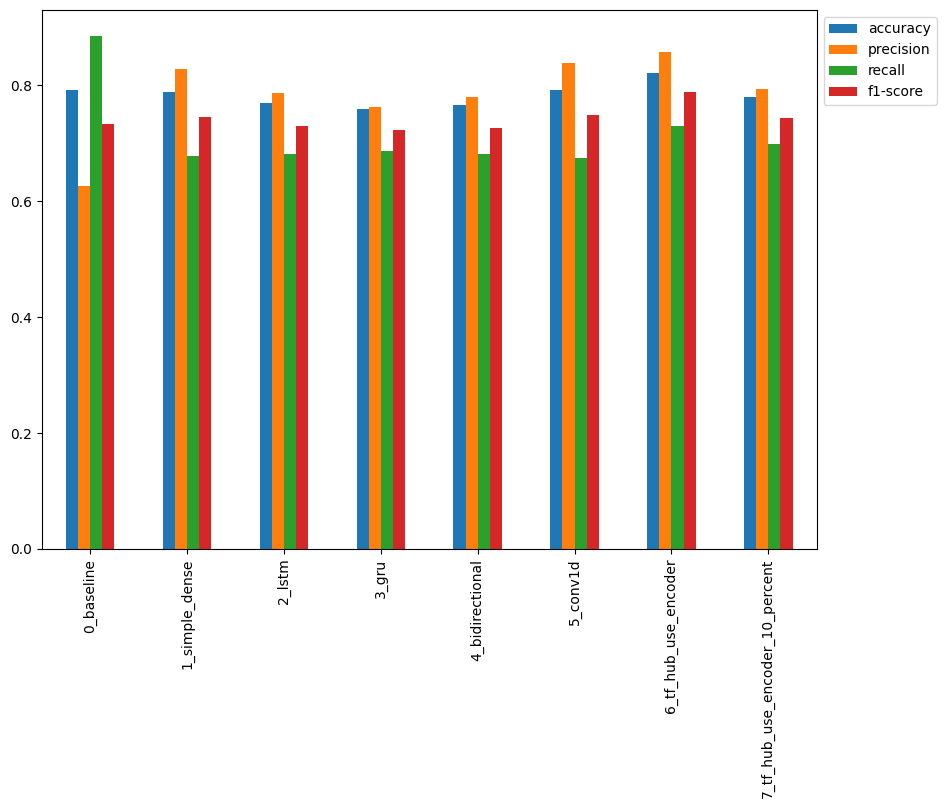

In [171]:
all_model_results.plot(kind = 'bar', figsize = (10, 7)).legend(bbox_to_anchor = (1.0, 1.0))

In [180]:
# sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

KeyError: ignored

## Finding the most wrong examples

In [181]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-09-15 20:56:20--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  21.6MB/s    in 47s     

2023-09-15 20:57:07 (19.5 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.

In [182]:
# Import previously trained model form Google Stroage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [184]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 0s 17ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [188]:
# Create DAtaFrame with validatiaon sentences and best performing model predictions
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'pred': model_6_pretrained_preds,
                       'pred_prob': tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [189]:
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending = False)

In [192]:
most_wrong.head()

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213


In [194]:
most_wrong.tail()

,text,target,pred,pred_prob
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [195]:
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Probs: {pred_prob}")
  print(f"Text: \n{text}\n")
  print("=========\n")

Target: 0, Pred: 1.0, Probs: 0.9101957678794861
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying


Target: 0, Pred: 1.0, Probs: 0.8769821524620056
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J


Target: 0, Pred: 1.0, Probs: 0.8523001074790955
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.


Target: 0, Pred: 1.0, Probs: 0.8354544043540955
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0


Target: 0, Pred: 1.0, Probs: 0.8272132873535156
Text: 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.


Target: 0, Pred: 1.0, Probs: 0.814815878868103
Text: 
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!


Target: 0, Pred:

In [196]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [197]:
test_sentences = test_df["text"].to_list()
test_sentences[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [199]:
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("=====\n")

1/1 [==============================] - 0s 61ms/step
Pred: 1, Prob: 0.5788106918334961
Text:
Amazing how smug this guy is about the use of mass murder as a global power play. https://t.co/AlTTBJy8B9

=====

1/1 [==============================] - 0s 61ms/step
Pred: 0, Prob: 0.23282627761363983
Text:
@thelovatoagent omg i feel like i am in a war zone

=====

1/1 [==============================] - 0s 76ms/step
Pred: 0, Prob: 0.3110685646533966
Text:
Call for Tasmania's emergency services to be trained in horse rescues http://t.co/q9OXqfdGwX #abcnews

=====

1/1 [==============================] - 0s 68ms/step
Pred: 0, Prob: 0.21247564256191254
Text:
Seattle's demolition-dodging 'Up' house to live on as affordable housing http://t.co/krGNNXj2sA

=====

1/1 [==============================] - 0s 62ms/step
Pred: 0, Prob: 0.3520844876766205
Text:
@SHGames Please fix the problem where zombies disable your Eco suit and the floor is electrocuted so u die auto magically plz

=====

1/1 [============

In [200]:
model_6_results

{'accuracy': 82.1522309711286,
 'precision': 0.8581081081081081,
 'recall': 0.7298850574712644,
 'f1-score': 0.7888198757763976}

In [201]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.6264367816091954,
 'recall': 0.8861788617886179,
 'f1-score': 0.734006734006734}

In [211]:
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [212]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6_pretrained, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 10ms/step


(0.36898139599907154, 0.0004842275538045558)

In [214]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.02028037700074492, 2.661466797998021e-05)

In [215]:
model_6_pretrained_results = calculate_results(val_labels, model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.8398692810457516,
 'recall': 0.7385057471264368,
 'f1-score': 0.7859327217125381}

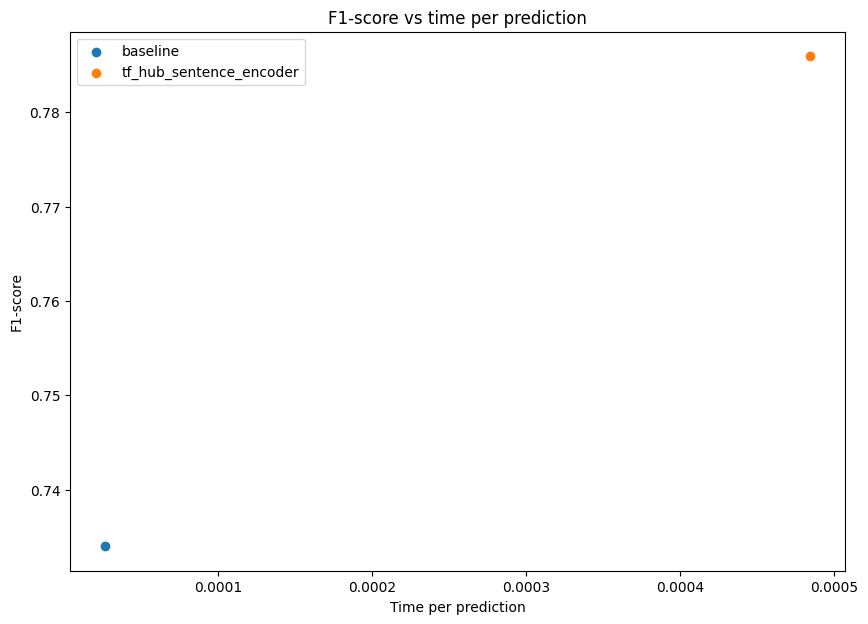

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 7))
plt.scatter(baseline_time_per_pred, baseline_results['f1-score'], label = 'baseline')
plt.scatter(model_6_time_per_pred, model_6_pretrained_results['f1-score'], label = 'tf_hub_sentence_encoder')
plt.legend()
plt.title("F1-score vs time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel('F1-score');